In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/ml/train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/ml/test.csv')

In [ ]:
train_dataset

,fever,bodyPain,age,runnyNose,diffBreath,infected
0,101.939717,0,42,0,-1,1
1,100.747854,0,8,1,1,0
2,98.599600,1,96,0,-1,1
3,99.451345,0,31,0,-1,0
4,100.055196,1,65,1,1,1
...,...,...,...,...,...,...
793,101.538783,1,6,1,0,1
794,98.429998,0,35,1,-1,1
795,101.684740,1,65,1,1,1
796,100.202937,0,30,1,-1,1


In [ ]:
train_dataset.columns

Index(['fever', 'bodyPain', 'age', 'runnyNose', 'diffBreath', 'infected'], dtype='object')

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fever       798 non-null    float64
 1   bodyPain    798 non-null    int64  
 2   age         798 non-null    int64  
 3   runnyNose   798 non-null    int64  
 4   diffBreath  798 non-null    int64  
 5   infected    798 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 37.5 KB


In [ ]:
test_dataset

,fever,bodyPain,age,runnyNose,diffBreath
0,99.912519,1,20,1,0
1,98.144790,1,69,1,-1
2,100.934417,0,3,1,-1
3,101.435131,1,8,0,0
4,99.839224,1,32,1,1
...,...,...,...,...,...
95,98.209833,1,92,1,0
96,98.316246,1,89,0,1
97,98.962966,1,27,1,-1
98,100.043955,0,27,1,-1


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fever       100 non-null    float64
 1   bodyPain    100 non-null    int64  
 2   age         100 non-null    int64  
 3   runnyNose   100 non-null    int64  
 4   diffBreath  100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [ ]:
train_dataset.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infected
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,99.916106,0.468672,50.482456,0.505013,-0.018797,0.536341
std,1.170141,0.499331,28.789402,0.500288,0.816024,0.498990
min,98.002426,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,98.912755,0.000000,25.000000,0.000000,-1.000000,0.000000
50%,99.835273,0.000000,50.000000,1.000000,0.000000,1.000000
75%,100.957035,1.000000,75.000000,1.000000,1.000000,1.000000
max,101.993067,1.000000,100.000000,1.000000,1.000000,1.000000


In [ ]:
train_dataset.corr()

,fever,bodyPain,age,runnyNose,diffBreath,infected
fever,1.000000,0.034580,-0.009786,-0.026106,0.007453,0.002886
bodyPain,0.034580,1.000000,-0.068030,0.000629,-0.027621,-0.048300
age,-0.009786,-0.068030,1.000000,0.058939,0.039962,-0.007380
runnyNose,-0.026106,0.000629,0.058939,1.000000,-0.007452,0.024400
diffBreath,0.007453,-0.027621,0.039962,-0.007452,1.000000,-0.012187
infected,0.002886,-0.048300,-0.007380,0.024400,-0.012187,1.000000


<Axes: title={'center': 'Infected(1) vs Not-Infected(0)'}, xlabel='Output class', ylabel='Count'>

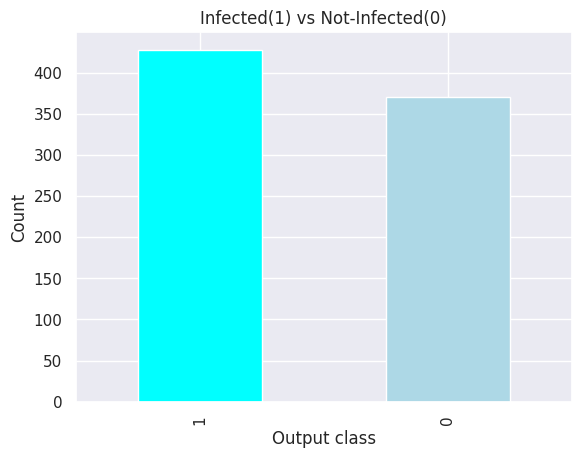

In [ ]:
train_dataset.infected.value_counts().plot.bar(color=['cyan', 'lightblue'],title="Infected(1) vs Not-Infected(0)", xlabel="Output class", ylabel = "Count")

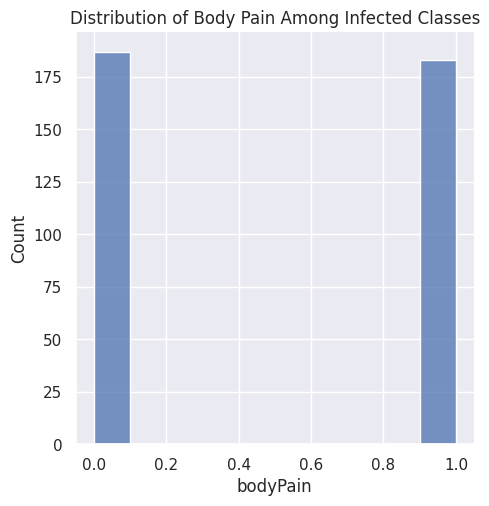

In [ ]:
temp = train_dataset.query('infected == 0')
sns.set_theme()
sns.displot(data=temp.bodyPain).set(title="Distribution of Body Pain Among Infected Classes", xlabel="bodyPain")

In [ ]:
train_dataset

,fever,bodyPain,age,runnyNose,diffBreath,infected
0,101.939717,0,42,0,-1,1
1,100.747854,0,8,1,1,0
2,98.599600,1,96,0,-1,1
3,99.451345,0,31,0,-1,0
4,100.055196,1,65,1,1,1
...,...,...,...,...,...,...
793,101.538783,1,6,1,0,1
794,98.429998,0,35,1,-1,1
795,101.684740,1,65,1,1,1
796,100.202937,0,30,1,-1,1


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fever       798 non-null    float64
 1   bodyPain    798 non-null    int64  
 2   age         798 non-null    int64  
 3   runnyNose   798 non-null    int64  
 4   diffBreath  798 non-null    int64  
 5   infected    798 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 37.5 KB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fever       100 non-null    float64
 1   bodyPain    100 non-null    int64  
 2   age         100 non-null    int64  
 3   runnyNose   100 non-null    int64  
 4   diffBreath  100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [ ]:
X_train = train_dataset.iloc[:, 0:5].values
y_train = train_dataset.iloc[:, 5].values

In [ ]:
output_dataset = pd.read_csv('/content/drive/MyDrive/ml/output.csv')

In [ ]:
X_test = test_dataset.iloc[:, :].values
y_test = output_dataset.iloc[:, 1].values

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(798, 5)
(798,)
(100, 5)
(798,)


LogisticRegression

In [ ]:
clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Not Affected'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

ValueError: ignored

SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear',C = 0.1))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Not Affected'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(leaf_size =1, n_neighbors = 4,p =1)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Not Affected'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth = 10,random_state = 0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Not Affected'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state = 0,max_depth = 8,min_samples_leaf = 1)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Not Affected'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)